In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Compressed Data**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Load the text files into a list of numpy arrays
cmprs_eeg_signals = []
cmprs_data_path = "/content/drive/MyDrive/Final yr project /ENCODING OUTPUT/" #focal and NonFocal


for i in range(1,101):
  if i<10:
    filename = 'F00{}.txt'.format(i) 
  elif i<100:
    filename = 'F0{}.txt'.format(i) 
  else:
    filename = 'F{}.txt'.format(i)
  signal = np.loadtxt(cmprs_data_path+filename)
  cmprs_eeg_signals.append(signal)

for i in range(1,101):
  if i<10:
    filename = 'N00{}.txt'.format(i)
  elif i<100:
    filename = 'N0{}.txt'.format(i)
  else:
    filename = 'N{}.txt'.format(i)
  signal = np.loadtxt(cmprs_data_path+filename)
  cmprs_eeg_signals.append(signal)

print(cmprs_eeg_signals)
print(len(cmprs_eeg_signals))

[array([ 4.21272904e-01,  1.29299593e+00,  3.04534644e-01,  1.40186131e+00,
        2.03010511e+00,  9.80524302e-01,  4.77057785e-01, -4.64302242e-01,
        9.37443525e-02, -4.72753644e-01, -1.93069011e-01, -4.87508357e-01,
       -3.53158772e-01, -1.13484418e+00,  6.14328325e-01,  5.56565113e-02,
       -4.53136891e-01,  3.81405890e-01,  3.16355973e-02, -3.63858879e-01,
       -5.77150762e-01, -7.35659301e-01, -1.04304403e-01, -1.26987010e-01,
        3.78624409e-01,  1.42705059e+00,  9.47043777e-01, -5.51132679e-01,
        1.15858100e-01, -8.91932189e-01,  1.47990957e-01,  1.23882318e+00,
        7.44151592e-01,  1.13329768e+00,  4.67931807e-01, -2.31543005e-01,
        5.06516576e-01, -2.05727398e-01, -3.46693128e-01, -2.95127332e-02,
        4.28542405e-01, -8.30214396e-02,  3.04422081e-01, -5.72585985e-02,
       -2.40756020e-01, -2.64684796e-01, -1.50826126e-01, -2.31387526e-01,
       -2.02227518e-01, -5.83121240e-01,  2.11915255e-01,  2.51766562e-01,
        4.22272712e-01, 

In [ ]:
# converting into a numpy array
cmprs_eeg_signals = np.array(cmprs_eeg_signals) 
print(cmprs_eeg_signals.shape)

# Create the labels
labels = np.zeros((cmprs_eeg_signals.shape[0],), dtype=np.int32)
labels[:100] = 0 # set the first 100 rows to class 0 -> (focal signals)
labels[100:] = 1 # set the next 100 rows to class 1 -> (non focal signals)

# Shuffle the data and labels
perm = np.random.permutation(len(cmprs_eeg_signals))
data = cmprs_eeg_signals[perm]
labels = labels[perm]

# saving the shuffled data and labels as numpy arrays to a file
np.save("cmprs_data.npy", data)
np.save("cmprs_labels.npy",labels)

print(data)
print(labels)

(200, 513)
[[-0.97145826  0.28889501  0.04634866 ... -0.10396302  0.30083758
   0.05450623]
 [ 0.43281665  0.16605029  0.20395736 ... -0.176375   -0.29470527
   0.04690414]
 [-0.6770159   0.58983904  0.97312719 ...  0.02473082  0.25298586
   0.11236161]
 ...
 [-0.12954617 -0.30226955 -0.96161962 ... -0.42840818  0.29574025
  -0.67075247]
 [ 0.69185382 -0.13001619  0.33860469 ... -0.18193366 -0.51702869
  -0.28775653]
 [-0.45345396  0.02375461 -0.38773426 ... -0.28210464  0.49343908
  -0.30364436]]
[0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0]


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the shuffled data and labels
data = np.load("cmprs_data.npy")
labels = np.load("cmprs_labels.npy")

# Split the data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=39)

# Train the logistic regression model
model = LogisticRegression(random_state=39)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.775
Precision: 0.7777777777777778
Recall: 0.7368421052631579
F1-score: 0.7567567567567567


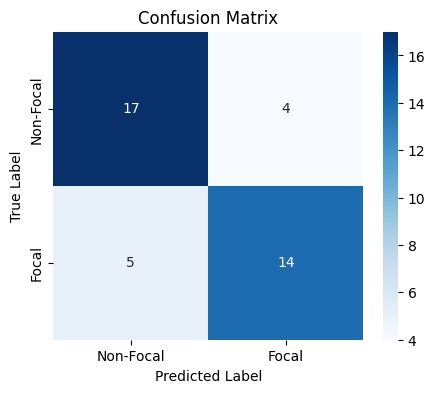

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
test_pred = model.predict(X_test)
test_pred = (test_pred > 0.5)

# Create the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Non-Focal', 'Focal']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


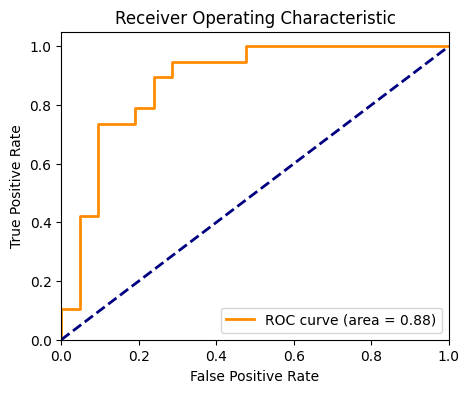

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test data
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**KNN**

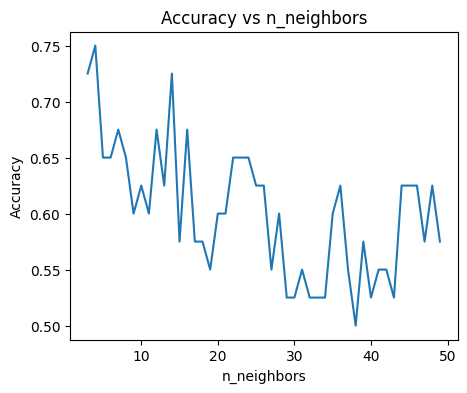

Accuracy: 0.725
Precision: 0.6538461538461539
Recall: 0.8947368421052632
F1-score: 0.7555555555555555


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load data
data = np.load('cmprs_data.npy')

# Load labels
labels = np.load('cmprs_labels.npy')

# Split data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Try different values of n_neighbors
accuracy_list = []

for n_neighbors in range(3,50):
    # Create a KNN classifier with k=n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the KNN classifier to the training data
    knn.fit(X_train, y_train)

    # Use the trained KNN model to make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the KNN model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plot the accuracy versus n_neighbors graph
plt.figure(figsize=(5, 4))
plt.plot(range(3,50), accuracy_list)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_neighbors')
plt.show()

# Create a KNN classifier with k=3
model = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
model.fit(X_train, y_train)

# Use the trained KNN model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


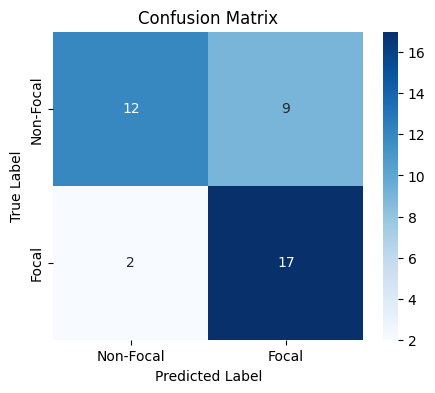

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
test_pred = model.predict(X_test)
test_pred = (test_pred > 0.5)

# Create the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Non-Focal', 'Focal']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


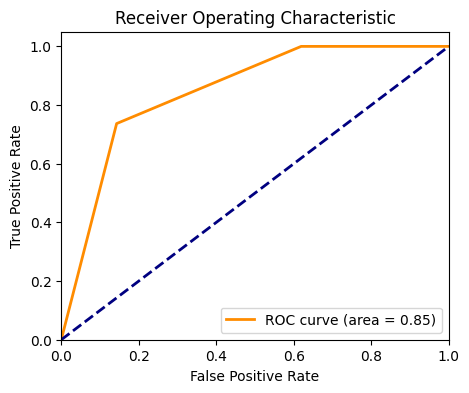

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test data
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**SVM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = np.load('cmprs_data.npy')

# Load labels
labels = np.load('cmprs_labels.npy')

# Split data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='rbf')

# Fit the SVM classifier to the training data
svm.fit(X_train, y_train)

# Use the trained SVM model to make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.75
Precision: 0.6956521739130435
Recall: 0.8421052631578947
F1-score: 0.761904761904762


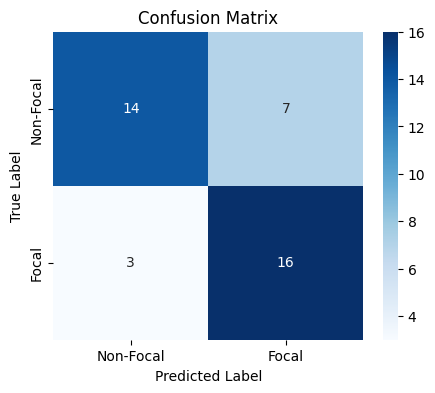

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
test_pred = svm.predict(X_test)
test_pred = (test_pred > 0.5)

# Create the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Non-Focal', 'Focal']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Ensemble Model using Random Forest**

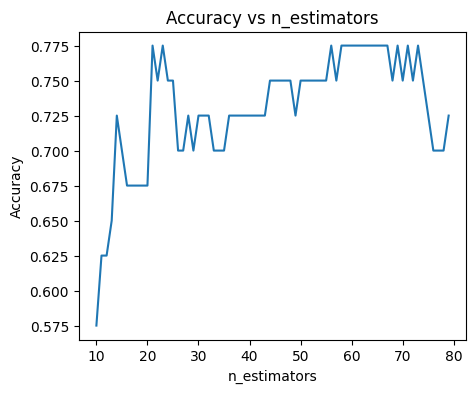

Accuracy: 0.775
Precision: 0.8260869565217391
Recall: 0.7916666666666666
F1-score: 0.8085106382978724


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
data = np.load('cmprs_data.npy')

# Load labels
labels = np.load('cmprs_labels.npy')

# Split data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=13)

# Try different values of n_estimators
accuracy_list = []

for n_estimators in range(10,80):
    # Create a random forest classifier with n_estimators trees
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=13)

    # Fit the random forest classifier to the training data
    rf.fit(X_train, y_train)

    # Use the trained random forest model to make predictions on the test data
    y_pred = rf.predict(X_test)

    # Calculate the accuracy of the random forest model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plot the accuracy versus n_estimators graph
plt.figure(figsize=(5, 4))
plt.plot(range(10,80), accuracy_list)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

# Create a random forest classifier with best n_estimators no. of trees
rf = RandomForestClassifier(n_estimators=21, random_state=13)

# Fit the random forest classifier to the training data
rf.fit(X_train, y_train)

# Use the trained random forest model to make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

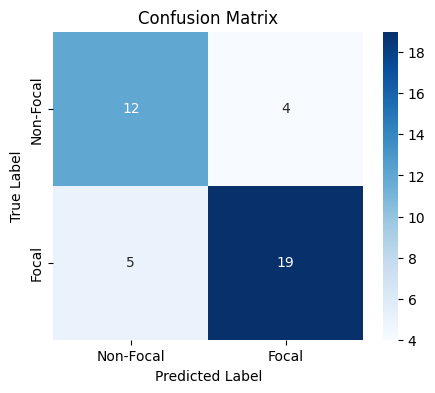

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
test_pred = rf.predict(X_test)
test_pred = (test_pred > 0.5)

# Create the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Non-Focal', 'Focal']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


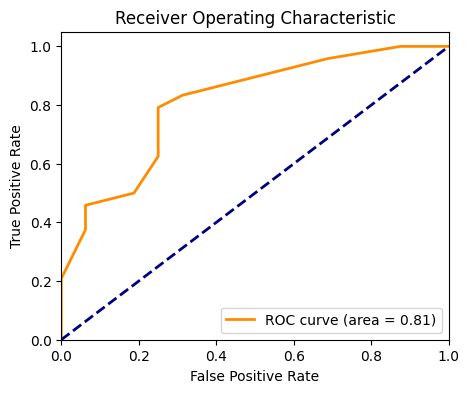

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test data
y_scores = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Ensemble Model using AdaBoost**

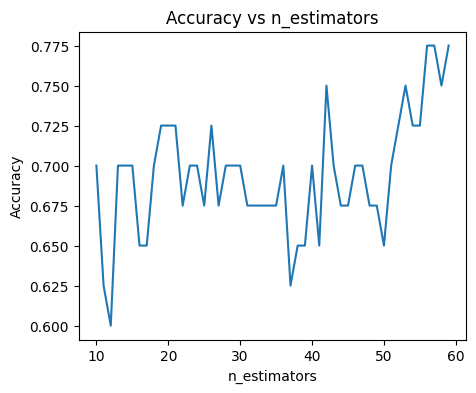

Accuracy: 0.75
Precision: 0.85
Recall: 0.7083333333333334
F1-score: 0.7727272727272727


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load data
data = np.load('data.npy')

# Load labels
labels = np.load('labels.npy')

# Split data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=13)

# Try different values of n_estimators
accuracy_list = []

for n_estimators in range(10,60):
  # Create an AdaBoost classifier with n_estimators stumps
  ada = AdaBoostClassifier(n_estimators=n_estimators, random_state=13)

  # Fit the AdaBoost classifier to the training data
  ada.fit(X_train, y_train)

  # Use the trained AdaBoost model to make predictions on the test data
  y_pred = ada.predict(X_test)

  # Calculate the accuracy of the random forest model on the test data
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

# Plot the accuracy versus n_estimators graph
plt.figure(figsize=(5, 4))
plt.plot(range(10,60), accuracy_list)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

# Create an AdaBoost classifier with 58 decision stumps
ada = AdaBoostClassifier(n_estimators=58, random_state=13)

# Fit the AdaBoost classifier to the training data
ada.fit(X_train, y_train)

# Use the trained AdaBoost model to make predictions on the test data
y_pred = ada.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

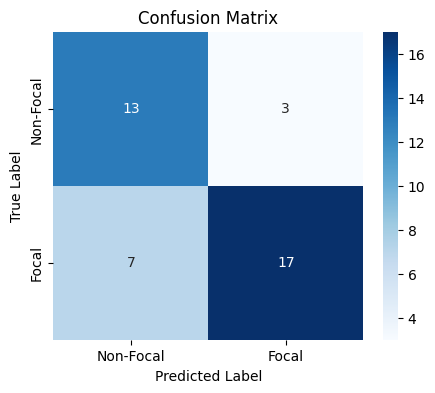

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
test_pred = ada.predict(X_test)
test_pred = (test_pred > 0.5)

# Create the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Non-Focal', 'Focal']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


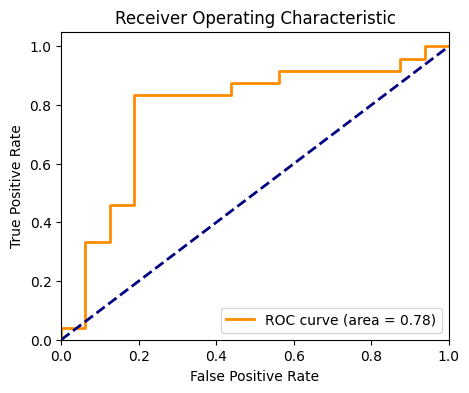

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test data
y_scores = ada.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




---



**Deep Learning Models**

**MLP**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load the data and labels
data = np.load("data.npy")  
labels = np.load("labels.npy") 

# Split the data and labels into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=14)

# Create an MLP classifier with one hidden layer of 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(1000,500,100), max_iter=1000, random_state=0)

# Train the MLP classifier on the training data
history = mlp.fit(train_data, train_labels)

# Get the predictions on the test data
y_pred = mlp.predict(test_data)

# Calculate the validation accuracy
val_accuracy = mlp.score(test_data, test_labels)
print('Validation Accuracy:', val_accuracy)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred))


Validation Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.83      0.79      0.81        19

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



2/2 [==============================] - 0s 14ms/step


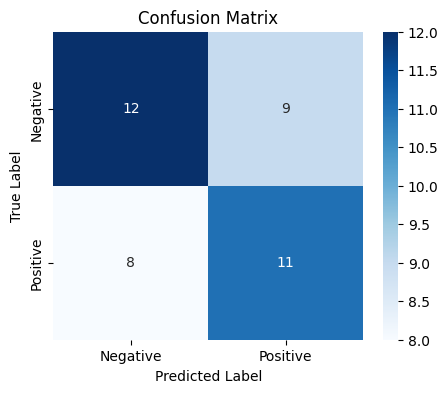

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
test_pred = mlp.predict(test_data)
test_pred = (test_pred > 0.5)

# Get the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Define the class names
class_names = ['Negative', 'Positive']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

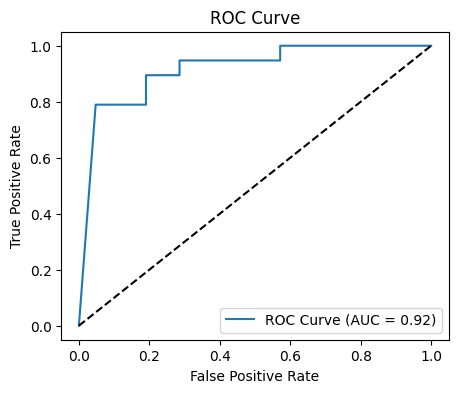

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate and plot the ROC curve and AUC score
y_score = mlp.predict_proba(test_data)[:,1]
fpr, tpr, thresholds = roc_curve(test_labels, y_score)
roc_auc = roc_auc_score(test_labels, y_score)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Conv1D**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the data and labels
data = np.load("data.npy")  
labels = np.load("labels.npy") 

# Split the data and labels into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=2)

# Define the input shape
input_shape = (train_data.shape[1], 1)

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/20
5/5 [==============================] - 1s 122ms/step - loss: 83.8497 - accuracy: 0.4938 - val_loss: 37.2440 - val_accuracy: 0.5250
Epoch 2/20
5/5 [==============================] - 0s 86ms/step - loss: 41.3569 - accuracy: 0.5938 - val_loss: 9.2069 - val_accuracy: 0.6750
Epoch 3/20
5/5 [==============================] - 0s 84ms/step - loss: 17.1705 - accuracy: 0.6812 - val_loss: 5.7800 - val_accuracy: 0.8000
Epoch 4/20
5/5 [==============================] - 0s 76ms/step - loss: 6.3660 - accuracy: 0.8188 - val_loss: 15.2612 - val_accuracy: 0.8000
Epoch 5/20
5/5 [==============================] - 0s 77ms/step - loss: 1.7113 - accuracy: 0.9062 - val_loss: 6.7679 - val_accuracy: 0.7750
Epoch 6/20
5/5 [==============================] - 0s 77ms/step - loss: 2.1319 - accuracy: 0.8875 - val_loss: 6.6720 - val_accuracy: 0.7750
Epoch 7/20
5/5 [==============================] - 0s 75ms/step - loss: 0.1372 - accuracy: 0.9812 - val_loss: 9.5464 - val_accuracy: 0.7750
Epoch 8/20
5/5 [=====

In [ ]:
# Print the model summary
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 4095, 32)          128       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 2047, 32)         0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 65504)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65505     
                                                                 
Total params: 65,633
Trainable params: 65,633
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_data)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, np.round(predictions)))

2/2 - 0s - loss: 5.2294 - accuracy: 0.8750 - 47ms/epoch - 23ms/step
Test loss: 5.229405403137207
Test accuracy: 0.875
2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.89      0.84      0.86        19

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



2/2 [==============================] - 0s 10ms/step


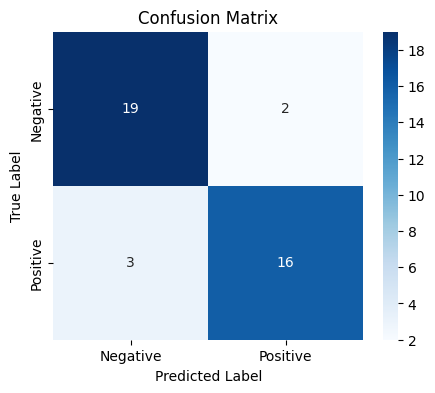

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
test_pred = model.predict(test_data)
test_pred = (test_pred > 0.5)

# Get the confusion matrix
cm = confusion_matrix(test_labels, test_pred)

# Define the class names
class_names = ['Negative', 'Positive']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

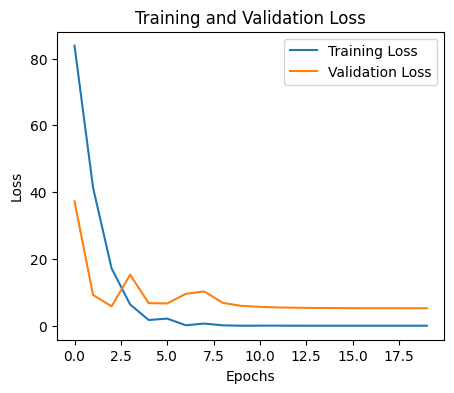

In [ ]:
# Get training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(5, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


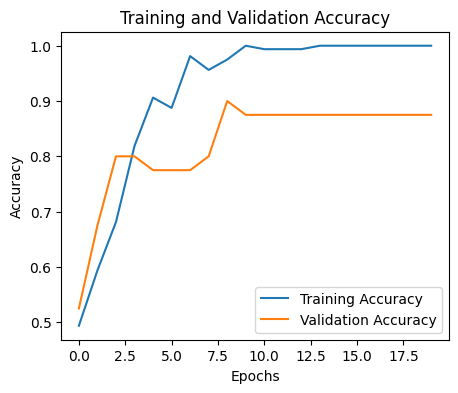

In [ ]:
# Get training and validation accuracy curves
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(5, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 0s 10ms/step


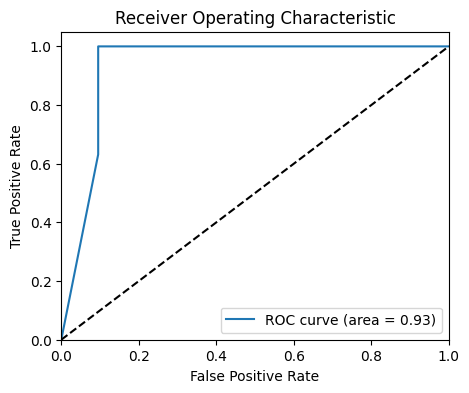

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for test data
y_pred_proba = model.predict(test_data)

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate area under curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the model
model.save('localiser_model.h5')

**RNN Based Transformer**

In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

num_classes = 2
input_shape = (4097,)

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 2
num_epochs = 50
projection_dim = 64
num_heads = 4

transformer_units = [    projection_dim * 2,    projection_dim,]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x 


def create_rnn_transformer():
    inputs = layers.Input(shape=input_shape)
    x = layers.Embedding(input_dim=input_shape[0], output_dim=projection_dim)(inputs)
    
    for _ in range(transformer_layers):
        x = layers.LSTM(projection_dim, return_sequences=True)(x)
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x, x)
        x = layers.Add()([attention_output, x])
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        x = mlp(x, hidden_units=transformer_units, dropout_rate=0.1)
        x = layers.Add()([x, attention_output])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(x)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    logits = layers.Dense(num_classes)(features)
    
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history


rnn_transformer = create_rnn_transformer()
history = run_experiment(rnn_transformer)

Epoch 1/60
15/15 [==============================] - 35s 1s/step - loss: 4.4582 - accuracy: 0.5139 - val_loss: 6.7843 - val_accuracy: 0.3125
Epoch 2/60
15/15 [==============================] - 15s 989ms/step - loss: 6.5139 - accuracy: 0.5208 - val_loss: 1.4020 - val_accuracy: 0.3750
Epoch 3/60
15/15 [==============================] - 16s 1s/step - loss: 3.4184 - accuracy: 0.5208 - val_loss: 4.3618 - val_accuracy: 0.6875
Epoch 4/60
15/15 [==============================] - 15s 1s/step - loss: 3.5214 - accuracy: 0.5556 - val_loss: 0.7061 - val_accuracy: 0.7500
Epoch 5/60
15/15 [==============================] - 16s 1s/step - loss: 5.1417 - accuracy: 0.5694 - val_loss: 0.8340 - val_accuracy: 0.6875
Epoch 6/60
15/15 [==============================] - 15s 966ms/step - loss: 2.8451 - accuracy: 0.4722 - val_loss: 3.6933 - val_accuracy: 0.3125
Epoch 7/60
15/15 [==============================] - 15s 992ms/step - loss: 1.8900 - accuracy: 0.5208 - val_loss: 1.4357 - val_accuracy: 0.3125
Epoch 8/60


2/2 [==============================] - 1s 162ms/step


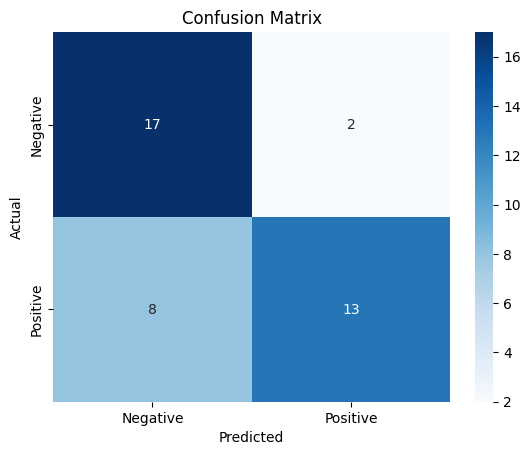

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred = rnn_transformer.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class labels
class_labels = ['Negative', 'Positive'] # Replace with your actual class labels

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


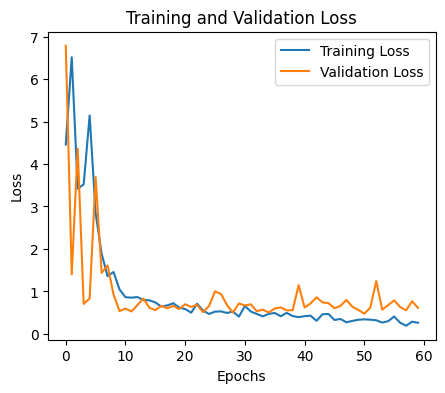

In [ ]:
# Get training and validation loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(5, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

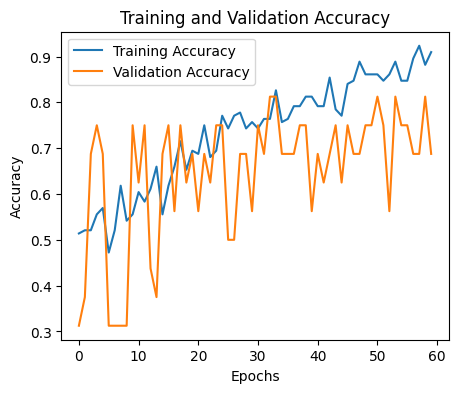

In [ ]:
# Get training and validation accuracy curves
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.figure(figsize=(5, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2/2 [==============================] - 1s 179ms/step


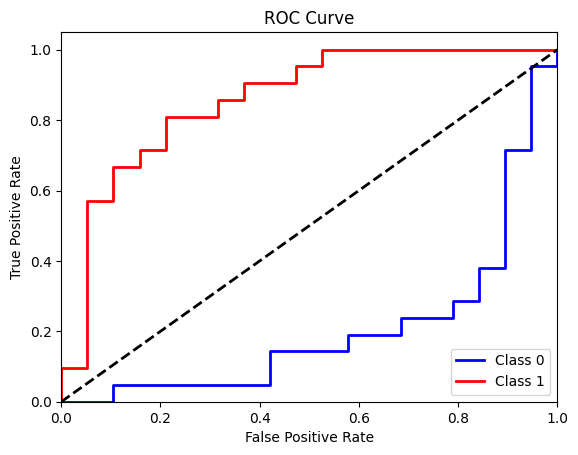

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predict the labels for the test set
y_pred = vit_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
colors = ["blue", "red"]
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f"Class {i}")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
